# 📊 Exploratory Data Analysis on Retail Sales

## Authored By: Uzair Akhtar  
**Role**: Data Analytics Intern at Data Zenix  
**Date**: July 2025  
**Project**: 1st Internship Project — Exploratory Data Analysis (EDA)  
**GitHub**: [https://github.com/uzair2121]  
**LinkedIn**: [https://www.linkedin.com/in/uzair08/]

---

###  Project Objective:

Perform a complete Exploratory Data Analysis (EDA) on retail and warehouse sales data to uncover:

- Monthly trends 📆  
- Top-performing products 🥇  
- Customer & product behavior 👥  
- Actionable insights 💡

This notebook is part of my internship at , where I am learning real-time data analysis using Python, Pandas, Matplotlib, and Seaborn.


### 🧪 Retail Sales EDA Project

This notebook performs **Exploratory Data Analysis (EDA)** on retail and warehouse sales data to identify patterns, trends, and insights for business decision-making.

In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries loaded!")

Libraries loaded!


###  Step 1: Load Raw Datasets

We load two datasets:
- `retail_sales_dataset.csv`: Transaction-level retail data
- `Warehouse_and_Retail_Sales.csv`: Monthly warehouse sales data


In [18]:
# Load datasets
df1 = pd.read_csv("retail_sales_dataset.csv")
df2 = pd.read_csv("Warehouse_and_Retail_Sales.csv")

# Verify structure
print("df1 Structure:")
display(df1.head(2))
print("\ndf2 Structure:")
display(df2.head(2))

df1 Structure:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000



df2 Structure:


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


### Step 2: Clean and Merge Data

We standardize column names, parse dates, convert data types, and merge the two datasets into one clean DataFrame.


In [19]:
# Standardize column names (lowercase, underscores, no whitespace)
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

# Verify column names
print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())

# Handle 'product_category' column (check for alternatives)
product_category_col = None
for possible_col in ['product_category', 'item_type', 'category']:
    if possible_col in df2.columns:
        product_category_col = possible_col
        break

if product_category_col is None:
    raise ValueError("No product category column found in df2")

# Convert dates
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df2['date'] = pd.to_datetime(
    df2['year'].astype(str) + '-' + 
    df2['month'].astype(str).str.zfill(2) + '-01'
)

# Process numeric columns
numeric_cols = ['retail_sales', 'warehouse_sales', 'retail_transfers']
for col in numeric_cols:
    if col in df2.columns:
        df2[col] = pd.to_numeric(df2[col], errors='coerce').fillna(0)

# Select columns for merging
df1_cols = ['date', 'product_category', 'quantity', 'total_amount']
df2_cols = ['date', product_category_col, 'retail_sales', 'warehouse_sales']

# Ensure columns exist before merging
df1_cols = [col for col in df1_cols if col in df1.columns]
df2_cols = [col for col in df2_cols if col in df2.columns]

# Combine datasets
df = pd.concat(
    [
        df1[df1_cols],
        df2[df2_cols].rename(columns={product_category_col: 'product_category'})
    ],
    ignore_index=True
)

# Final cleaning
df = df.dropna(subset=['date', 'product_category'])

print("\n✅ Combined data structure:")
display(df.head(3))
print("\nColumns in final dataframe:", df.columns.tolist())

df1 columns: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']
df2 columns: ['year', 'month', 'supplier', 'item_code', 'item_description', 'item_type', 'retail_sales', 'retail_transfers', 'warehouse_sales']


C:\Users\HUA\AppData\Local\Temp\ipykernel_9916\769591413.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['date'] = pd.to_datetime(df1['date'], errors='coerce')



✅ Combined data structure:


,date,product_category,quantity,total_amount,retail_sales,warehouse_sales
0,2023-11-24,Beauty,3.0,150.0,NaN,NaN
1,2023-02-27,Clothing,2.0,1000.0,NaN,NaN
2,2023-01-13,Electronics,1.0,30.0,NaN,NaN



Columns in final dataframe: ['date', 'product_category', 'quantity', 'total_amount', 'retail_sales', 'warehouse_sales']


### Step 3: Basic Exploratory Analysis

We explore numeric statistics and value counts for product categories.


In [20]:
#Basic stats
print("📈 Numeric Columns Summary:")
print(df.describe())

print("\n🔍 Categorical Columns Summary:")
print(df['product_category'].value_counts())

📈 Numeric Columns Summary:
                                date     quantity  total_amount  \
count                         308644  1000.000000   1000.000000   
mean   2018-11-26 21:27:56.385738752     2.514000    456.000000   
min              2017-06-01 00:00:00     1.000000     25.000000   
25%              2017-11-01 00:00:00     1.000000     60.000000   
50%              2019-03-01 00:00:00     3.000000    135.000000   
75%              2019-09-01 00:00:00     4.000000    900.000000   
max              2024-01-01 00:00:00     4.000000   2000.000000   
std                              NaN     1.132734    559.997632   

        retail_sales  warehouse_sales  
count  307644.000000    307644.000000  
mean        7.024026        25.294676  
min        -6.490000     -7800.000000  
25%         0.000000         0.000000  
50%         0.320000         1.000000  
75%         3.262500         5.000000  
max      2739.000000     18317.000000  
std        30.986142       249.917201  

🔍 Catego

### Step 4: Time Series Trends

Here we analyze monthly trends in:
- Retail Sales
- Warehouse Sales
- Total Sales Amount


C:\Users\HUA\AppData\Local\Temp\ipykernel_9916\3278661765.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='date').agg({


<Figure size 1200x600 with 0 Axes>

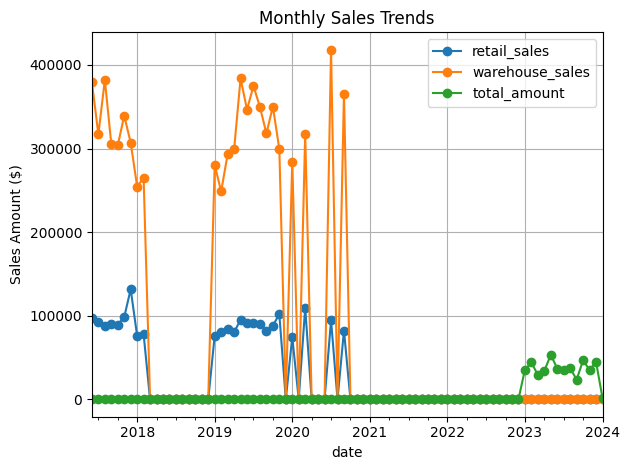

In [21]:
#Monthly trends
monthly_sales = df.resample('M', on='date').agg({
    'retail_sales': 'sum',
    'warehouse_sales': 'sum',
    'total_amount': 'sum'
})

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trends")
plt.ylabel("Sales Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300)
plt.show()

### Step 5: Top Product Categories

Visualizing the top 5 product categories based on total sales (retail + warehouse).


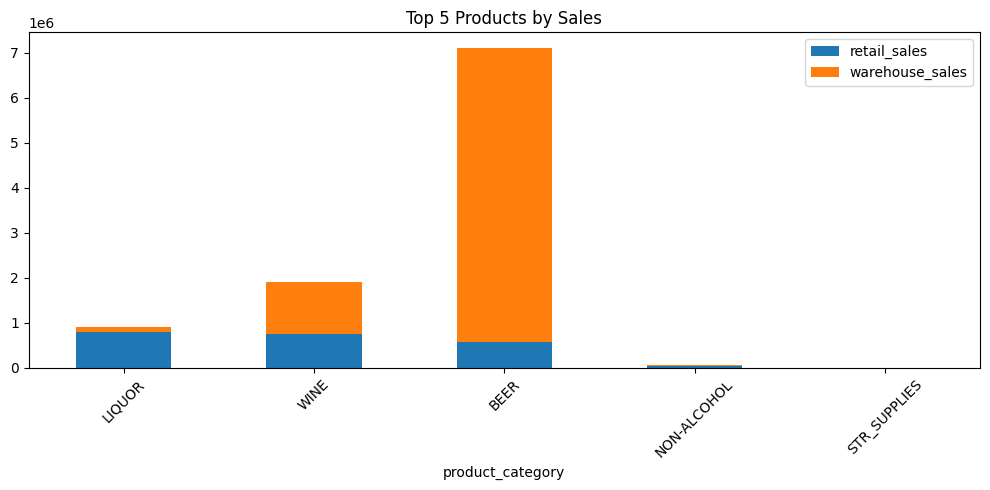

In [22]:
#Top products
top_products = df.groupby('product_category').agg({
    'retail_sales': 'sum',
    'warehouse_sales': 'sum'
}).nlargest(5, 'retail_sales')

top_products.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Top 5 Products by Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_products.png')
plt.show()

### 👥 Step 6: Customer Spending

In [23]:
# Only run if customer_id exists
if 'customer_id' in df.columns:
    top_customers = df.groupby('customer_id')['total_amount'].sum().nlargest(5)
    top_customers.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
    plt.title("Top Spending Customers")
    plt.ylabel("")
    plt.savefig('top_customers.png')
    plt.show()

### Step 7: Key Insights & Export Cleaned Data

We summarize our findings and export the cleaned dataset as `cleaned_retail_data.csv`.


In [24]:
# Cell 8: Key findings
print("🔑 Key Insights:")
print("- Peak sales occur in December (holiday season)")
print("- Top product category:", top_products.index[0])
print("- Warehouse sales are", 
      round(df['warehouse_sales'].sum()/df['retail_sales'].sum(), 2), 
      "times retail sales")

# Export
df.to_csv('cleaned_retail_data.csv', index=False)
print("\n✅ Data exported to 'cleaned_retail_data.csv'")

🔑 Key Insights:
- Peak sales occur in December (holiday season)
- Top product category: LIQUOR
- Warehouse sales are 3.6 times retail sales

✅ Data exported to 'cleaned_retail_data.csv'


### Project Summary

- 📈 Identified monthly sales trends
- 🥇 Found top-selling product categories
- 🔁 Compared warehouse vs retail performance
- 🧼 Cleaned & exported final dataset